<a href="https://colab.research.google.com/github/allanbraquiel/desafio_churn_foursys/blob/main/Desafio_Churn_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
churn_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/churn_data.csv")
customer_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/customer_data.csv")
internet_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/internet_data.csv")
telecom_dict = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/Telecom+Churn+Data+Dictionary.csv", encoding="latin1")

In [ ]:
telecom_dict

,S.No.,Variable Name,Meaning
0,1,CustomerID,The unique ID of each customer
1,2,Gender,The gender of a person
2,3,SeniorCitizen,Whether a customer can be classified as a seni...
3,4,Partner,If a customer is married/ in a live-in relatio...
4,5,Dependents,If a customer has dependents (children/ retire...
5,6,Tenure,The time for which a customer has been using t...
6,7,PhoneService,Whether a customer has a landline phone servic...
7,8,MultipleLines,Whether a customer has multiple lines of inter...
8,9,InternetService,The type of internet services chosen by the cu...
9,10,OnlineSecurity,Specifies if a customer has online security.


In [ ]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [ ]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [ ]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


Fazendo o merge de uma só vez com os 3 arquivos

In [ ]:
df_union = churn_data.merge(customer_data, how="inner", on="customerID").merge(internet_data, how="inner", on="customerID")

In [ ]:
df_union.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
df_union.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Alterando o nome das colunas

In [ ]:
df_union.rename(columns = {"customerID": "ClienteID", "tenure": "TempoServico", "PhoneService": "ServicoTelefone", "Contract": "Contrato",
                           "PaperlessBilling": "FaturaSemPapel", "PaymentMethod": "FormaPagamento", "MonthlyCharges": "EncargosMensais",
                           "TotalCharges": "CustoTotal", "gender": "Genero", "SeniorCitizen": "Idoso", "Partner": "Casado", 
                           "Dependents": "Dependentes", "MultipleLines": "MultiplasLinhas", 'InternetService': "ServicoInternet", 
                           'OnlineSecurity': "SegurancaOnline", 'OnlineBackup': "BackupOnline", 'DeviceProtection': "ProtecaoDispositivo", 
                           'TechSupport': "SuporteTecnico", 'StreamingMovies': "StreamingFilmes"}, inplace=True)

In [ ]:
def altera_nome(nome):
  if nome == "Yes":
    return "Sim"
  else:
    return "Não"

df_union.Churn = df_union.Churn.map(altera_nome)

In [ ]:
df_union.CustoTotal = pd.to_numeric(df_union["CustoTotal"], errors='coerce')

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

# para edições nos gráficos: https://plotly.com/python/histograms/
# painel de cores: https://plotly.com/python/discrete-color/

for coluna in df_union:
    if coluna != "ClienteID":
        fig = make_subplots(rows=5, cols=4)
        fig = px.histogram(df_union, x=coluna, color="Churn", color_discrete_sequence=px.colors.qualitative.Pastel2)        
        fig.show()
        #display(df_union.pivot_table(index="Churn", columns=coluna, aggfunc='count')["ClienteID"])

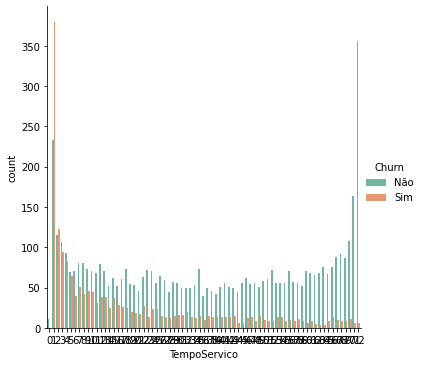

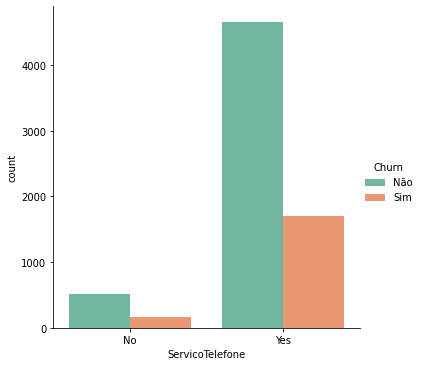

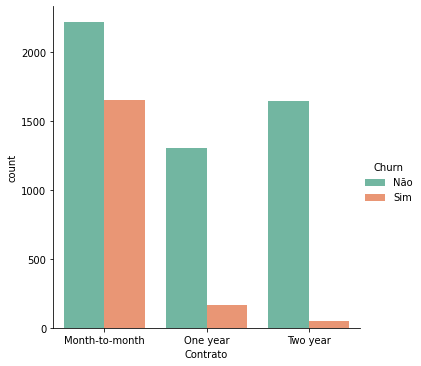

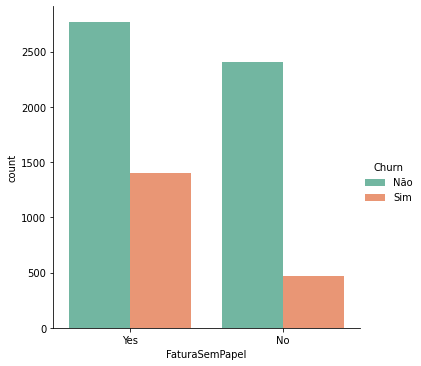

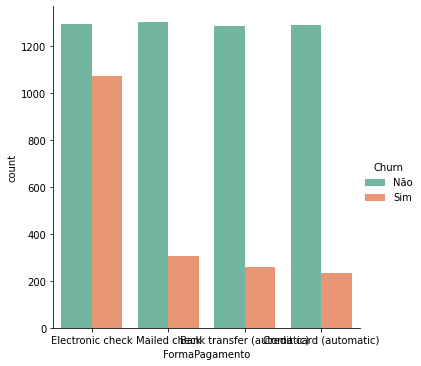

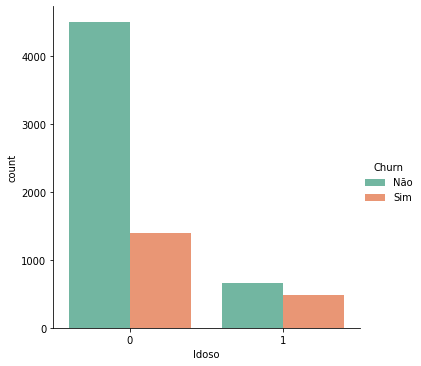

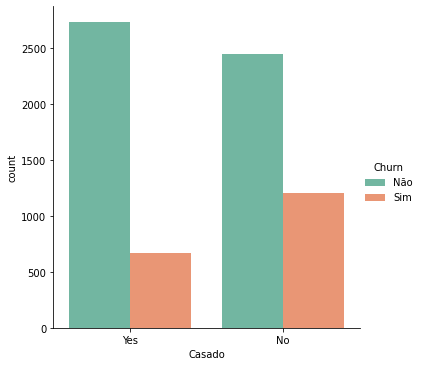

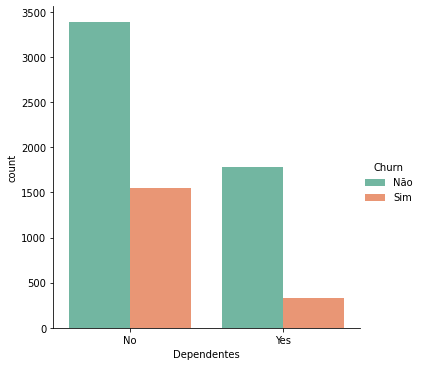

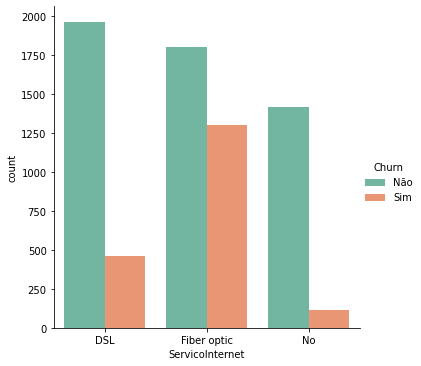

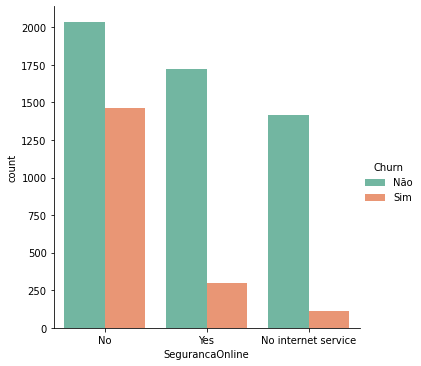

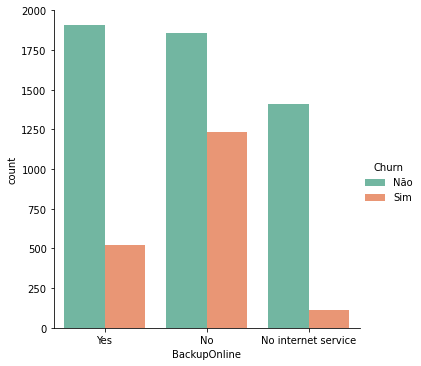

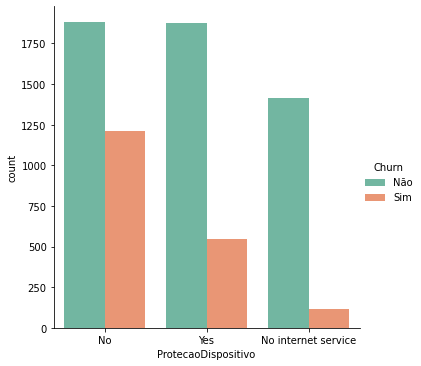

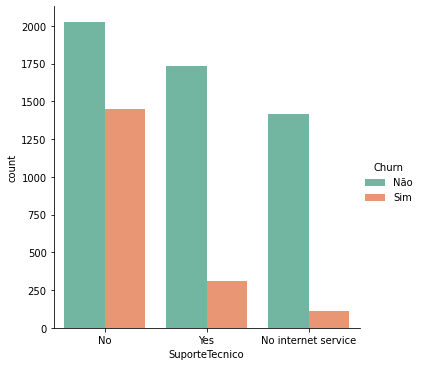

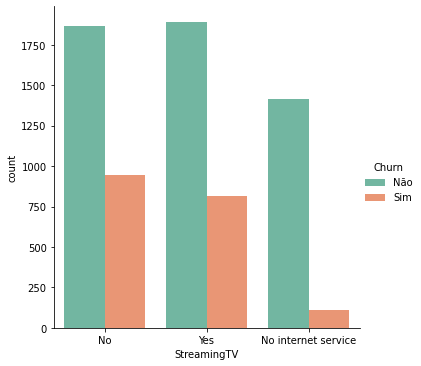

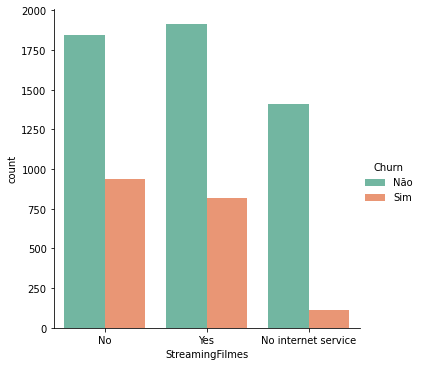

In [ ]:
#plt.figure(1, figsize=(18, 6))
lista = ['TempoServico', 'ServicoTelefone', 'Contrato', 'FaturaSemPapel', 'FormaPagamento', 'Idoso', 'Casado', 'Dependentes',
         'ServicoInternet', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV', 'StreamingFilmes']

for i in lista:
  sns.catplot(x=i, kind="count", palette="Set2", hue="Churn", data=df_union)

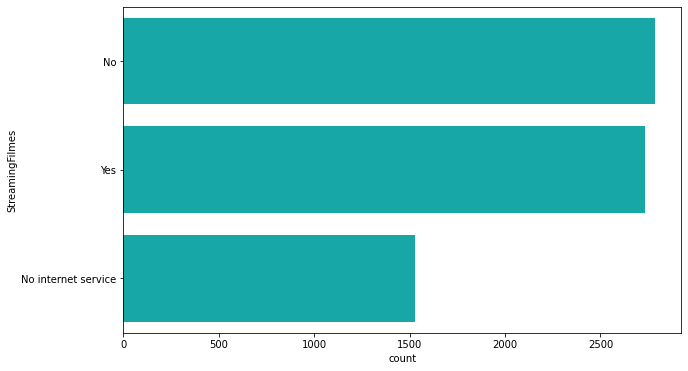

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y="StreamingFilmes", data=df_union, color="c")


# Hipóteses a serem analisadas:

Tempo de Serviço:
Clientes com pouco tempo, até 3 meses, tendem a candelar mais do que os que permanecem mais de 6 meses.

Serviço de Telefone:
Pessoas com serviço telefonico cancelam mais dos que não tem

Contrato:
Contratos Mês a mês cancelam mais do que contratos anuais e de 2 anos

Fatura sem papel:
Quem opta por fatura sem papel tende a cancelar mais

Forma de pagamento:
Pessoas que optam pela forma de pagamento Electronico check cancelam mais

Encargos Mensais:
Encargos mensais entre 70 e 100 reais cancelam mais

Custo total:
Custo até 200 reais são os que mais canvelam

Genero:
Indiferente

Idoso:
Pessas não idosas cancelam mais

Casado:
Pessoas solteiras cancelam mais

Dependentes:
Pessoas sem filhos cancelam mais

Multiplas Linhas:
Proporcionalmente é indiferente

Serviço Internet:
Clientes com Fibra optica cancelam mais

Segurança Online:
Clientes que não tem este serviço cancelam mais

Backup Online:
Quem não tem backup online cancelam mais

Proteção disposistivo:
Quem não tem proteção de dispositivo cancelam mais

Suporte Tecnico:
Quem não tem suporte tecnico cancelam mais

Streaming tv:
Quem não tem cancela mais

Streaming filmes:
Pouca diferença entre quem tem e não tem





Agora podemos separar em 3 grande grupos:

Pessoa:


> Genero

> Idoso

> Casado

> Dependentes


Contrato

> Tempo de serviço

> Serviço de telefone

> Contrato

> Fatura sem papel

> Forma de pagamento

> Encargos mensais

> Custo total


Serviços

> Multiplas linhas

> Serviços Internet

> Segurança online

> Backup online

> Proteção de dispositivo

> Suporte Tecnico

> Streaming TV

> Streaming Filmes




In [ ]:
df_union.head()

,ClienteID,TempoServico,ServicoTelefone,Contrato,FaturaSemPapel,FormaPagamento,EncargosMensais,CustoTotal,Churn,Genero,Idoso,Casado,Dependentes,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Não,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,Não,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Sim,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,Não,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Sim,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
pessoa = df_union.query("Casado == 'No' and Dependentes == 'No' and Idoso == 0")

In [ ]:
df_union.Churn.value_counts(normalize=True)

Não    0.73463
Sim    0.26537
Name: Churn, dtype: float64

In [ ]:
pessoa.Churn.value_counts(normalize=True)

Não    0.688488
Sim    0.311512
Name: Churn, dtype: float64

In [ ]:
contrato = df_union.query("TempoServico < 3 and ServicoTelefone == 'Yes' and Contrato == 'Month-to-month' & FaturaSemPapel == 'Yes' & FormaPagamento == 'Electronic check' & (EncargosMensais >= 70 and EncargosMensais <=100) and CustoTotal < 200")

In [ ]:
contrato.Churn.value_counts(normalize=True)

Sim    0.818182
Não    0.181818
Name: Churn, dtype: float64

In [ ]:
servicos = df_union.query("ServicoInternet == 'Fiber optic' and SegurancaOnline == 'No' and BackupOnline == 'No' and ProtecaoDispositivo == 'No' and SuporteTecnico == 'No'")

In [ ]:
servicos.Churn.value_counts(normalize=True)

Sim    0.635613
Não    0.364387
Name: Churn, dtype: float64

# Conclusões

Entre pessoas Jovens, solteiros e sem filhos a taxa de Churn aumenta 5 % em relação ao total geral

Entre pessoas que tem um contrato a menos de 3 meses, em contratos mensais e forma de pagamento Cheque eletronico, que gasta entre 70 e 100 Reais, tem um aumento de Churn de 55%.

Entre pessoas que não tem serviços como fibra optica, segurança online, backup online e suporte técnico, tem um aumento de 37%.



# Realizando previsões para novos clientes

In [ ]:
df_union.head(2)

,ClienteID,TempoServico,ServicoTelefone,Contrato,FaturaSemPapel,FormaPagamento,EncargosMensais,CustoTotal,Churn,Genero,Idoso,Casado,Dependentes,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Não,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,Não,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [ ]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ClienteID            7043 non-null   object 
 1   TempoServico         7043 non-null   int64  
 2   ServicoTelefone      7043 non-null   object 
 3   Contrato             7043 non-null   object 
 4   FaturaSemPapel       7043 non-null   object 
 5   FormaPagamento       7043 non-null   object 
 6   EncargosMensais      7043 non-null   float64
 7   CustoTotal           7032 non-null   float64
 8   Churn                7043 non-null   object 
 9   Genero               7043 non-null   object 
 10  Idoso                7043 non-null   int64  
 11  Casado               7043 non-null   object 
 12  Dependentes          7043 non-null   object 
 13  MultiplasLinhas      7043 non-null   object 
 14  ServicoInternet      7043 non-null   object 
 15  SegurancaOnline      7043 non-null   o

In [ ]:
lista_objects = df_union.select_dtypes(include=['object']).columns

In [ ]:
df_union = df_union[lista_objects].astype("category")

In [ ]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ClienteID            7043 non-null   category
 1   ServicoTelefone      7043 non-null   category
 2   Contrato             7043 non-null   category
 3   FaturaSemPapel       7043 non-null   category
 4   FormaPagamento       7043 non-null   category
 5   Churn                7043 non-null   category
 6   Genero               7043 non-null   category
 7   Casado               7043 non-null   category
 8   Dependentes          7043 non-null   category
 9   MultiplasLinhas      7043 non-null   category
 10  ServicoInternet      7043 non-null   category
 11  SegurancaOnline      7043 non-null   category
 12  BackupOnline         7043 non-null   category
 13  ProtecaoDispositivo  7043 non-null   category
 14  SuporteTecnico       7043 non-null   category
 15  StreamingTV          

Separando os dados de teste e treino

In [ ]:
x = df_union.drop(["ClienteID", "Churn"], axis=1, inplace=False)
y = df_union["Churn"]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ServicoTelefone      7043 non-null   category
 1   Contrato             7043 non-null   category
 2   FaturaSemPapel       7043 non-null   category
 3   FormaPagamento       7043 non-null   category
 4   Genero               7043 non-null   category
 5   Casado               7043 non-null   category
 6   Dependentes          7043 non-null   category
 7   MultiplasLinhas      7043 non-null   category
 8   ServicoInternet      7043 non-null   category
 9   SegurancaOnline      7043 non-null   category
 10  BackupOnline         7043 non-null   category
 11  ProtecaoDispositivo  7043 non-null   category
 12  SuporteTecnico       7043 non-null   category
 13  StreamingTV          7043 non-null   category
 14  StreamingFilmes      7043 non-null   category
dtypes: category(15)
memor

Label encoder

In [ ]:
from sklearn import preprocessing

In [ ]:
label1 = preprocessing.LabelEncoder()
label2 = preprocessing.LabelEncoder()
label3 = preprocessing.LabelEncoder()
label4 = preprocessing.LabelEncoder()
label5 = preprocessing.LabelEncoder()
label6 = preprocessing.LabelEncoder()
label7 = preprocessing.LabelEncoder()
label8 = preprocessing.LabelEncoder()
label9 = preprocessing.LabelEncoder()
label10 = preprocessing.LabelEncoder()
label11 = preprocessing.LabelEncoder()
label12 = preprocessing.LabelEncoder()
label13 = preprocessing.LabelEncoder()
label14 = preprocessing.LabelEncoder()
label15 = preprocessing.LabelEncoder()


In [ ]:
x.Contrato = label1.fit_transform(x.Contrato)
x.FaturaSemPapel = label2.fit_transform(x.FaturaSemPapel)
x.FormaPagamento = label3.fit_transform(x.FormaPagamento)
x.Genero = label4.fit_transform(x.Genero)
x.Casado = label5.fit_transform(x.Casado)
x.Dependentes = label6.fit_transform(x.Dependentes)
x.MultiplasLinhas = label7.fit_transform(x.MultiplasLinhas)
x.ServicoInternet = label8.fit_transform(x.ServicoInternet)
x.BackupOnline = label9.fit_transform(x.BackupOnline)
x.ProtecaoDispositivo = label10.fit_transform(x.ProtecaoDispositivo)
x.SuporteTecnico = label11.fit_transform(x.SuporteTecnico)
x.StreamingTV = label12.fit_transform(x.StreamingTV)
x.StreamingFilmes = label13.fit_transform(x.StreamingFilmes)
x.ServicoTelefone = label14.fit_transform(x.ServicoTelefone)
x.SegurancaOnline = label15.fit_transform(x.SegurancaOnline)


In [ ]:
x.head()

,ServicoTelefone,Contrato,FaturaSemPapel,FormaPagamento,Genero,Casado,Dependentes,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes
0,0,0,1,2,0,1,0,1,0,0,2,0,0,0,0
1,1,1,0,3,1,0,0,0,0,2,0,2,0,0,0
2,1,0,1,3,1,0,0,0,0,2,2,0,0,0,0
3,0,1,0,0,1,0,0,1,0,2,0,2,2,0,0
4,1,0,1,2,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
x.columns

Index(['ServicoTelefone', 'Contrato', 'FaturaSemPapel', 'FormaPagamento',
       'Genero', 'Casado', 'Dependentes', 'MultiplasLinhas', 'ServicoInternet',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes'],
      dtype='object')

Normalizando os dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(x)
colunas = ['ServicoTelefone', 'Contrato', 'FaturaSemPapel', 'FormaPagamento',
       'Genero', 'Casado', 'Dependentes', 'MultiplasLinhas', 'ServicoInternet',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes']
X = pd.DataFrame(X)
X.columns = colunas

In [ ]:
X.head()

,ServicoTelefone,Contrato,FaturaSemPapel,FormaPagamento,Genero,Casado,Dependentes,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes
0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.5,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.0,0.000000,1.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
num_folds = 10 #>> numero folds da validação cruzada
num_instances = len(X) #>> numero de instancias
seed = 7

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier()
arvore.fit(x_train, y_train)
result = arvore.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(arvore.score(x_test, y_test))
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

0.7075248461902508
[[1240  299]
 [ 319  255]]
              precision    recall  f1-score   support

         Não       0.80      0.81      0.80      1539
         Sim       0.46      0.44      0.45       574

    accuracy                           0.71      2113
   macro avg       0.63      0.62      0.63      2113
weighted avg       0.70      0.71      0.71      2113



In [ ]:
arvore.feature_importances_

array([0.01289679, 0.22629658, 0.06292518, 0.09517148, 0.06111229,
       0.05985948, 0.05876974, 0.06061477, 0.0343882 , 0.06751123,
       0.03881875, 0.06469527, 0.04632937, 0.05619329, 0.05441757])

In [ ]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [ ]:
feature_imp.sort_values(ascending=False)

Contrato               0.226297
FormaPagamento         0.095171
SegurancaOnline        0.067511
ProtecaoDispositivo    0.064695
FaturaSemPapel         0.062925
Genero                 0.061112
MultiplasLinhas        0.060615
Casado                 0.059859
Dependentes            0.058770
StreamingTV            0.056193
StreamingFilmes        0.054418
SuporteTecnico         0.046329
BackupOnline           0.038819
ServicoInternet        0.034388
ServicoTelefone        0.012897
dtype: float64

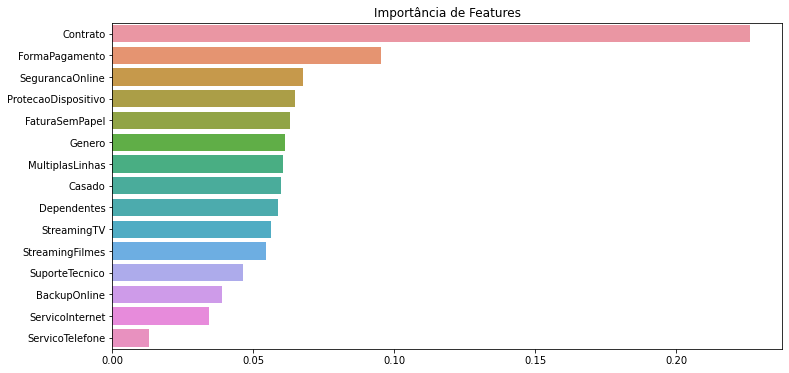

In [ ]:
plt.figure(figsize=(12, 6))
feature_imp_sort = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp_sort, y=feature_imp_sort.index)
plt.title("Importância de Features")
plt.show()

Testando varios modelos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

# Definindo os valores para o número de folds
num_folds = 5
num_instances = len(X)
seed = 7

# Preparando o modelo

modelos = []
modelos.append(("LogisticRegression", LogisticRegression()))
modelos.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=0, max_depth=30, max_features=5)))
modelos.append(("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=17, p=1)))
modelos.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(20, 10, 20), max_iter=3000)))
modelos.append(("SuportVectorMachine", SVC(kernel='linear', gamma='auto')))
modelos.append(("NaiveBayes", GaussianNB()))
modelos.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, max_depth=100, 
                                                                 bootstrap=True, random_state=0)))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
   kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
   cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
   resultados.append(cv_results)
   nomes.append(nome)
   msg = "%s - Acurácia: %f, Desvio Padrão: %f" % (nome, cv_results.mean(), cv_results.std())
   print(msg)

LogisticRegression - Acurácia: 0.774672, Desvio Padrão: 0.010684
DecisionTreeClassifier - Acurácia: 0.728380, Desvio Padrão: 0.010482
KNeighborsClassifier - Acurácia: 0.757207, Desvio Padrão: 0.011554
MLPClassifier - Acurácia: 0.765299, Desvio Padrão: 0.006610
SuportVectorMachine - Acurácia: 0.773962, Desvio Padrão: 0.009228
NaiveBayes - Acurácia: 0.748973, Desvio Padrão: 0.012684
RandomForestClassifier - Acurácia: 0.762742, Desvio Padrão: 0.006475


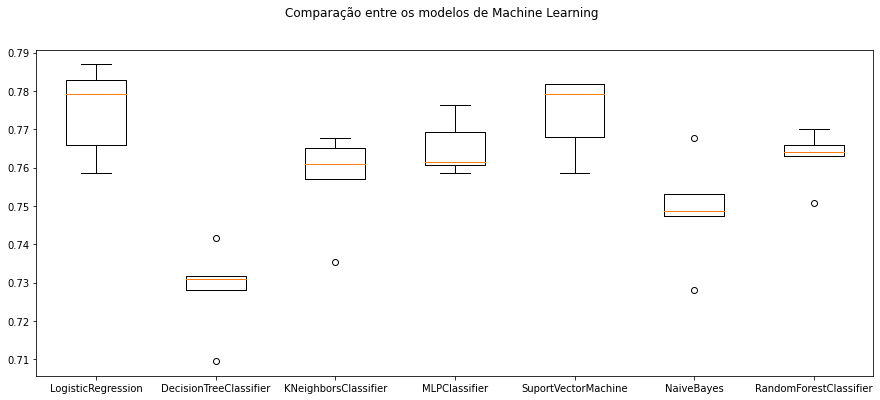

In [ ]:
# Boxplot para comparar os algoritmos
fig = plt.figure(figsize = (15, 6))
fig.suptitle("Comparação entre os modelos de Machine Learning")
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [ ]:
# transformando esses resultados em um Dataframe
df_resultado = pd.DataFrame(resultados, columns=["Resultado1", "Resultado2", "Resultado3", "Resultado4", "Resultado5"])
df_resultado

,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,0.782825,0.758694,0.765791,0.786932,0.779119
1,0.741661,0.731725,0.728176,0.709517,0.730824
2,0.765082,0.735273,0.760823,0.757102,0.767756
3,0.776437,0.758694,0.761533,0.769176,0.760653
4,0.779276,0.758694,0.767921,0.781960,0.781960
5,0.753016,0.728176,0.747339,0.767756,0.748580
6,0.770050,0.762952,0.765791,0.750710,0.764205


In [ ]:
df_nomes = pd.DataFrame(nomes, columns=["Nomes"])
df_nomes

,Nomes
0,LogisticRegression
1,DecisionTreeClassifier
2,KNeighborsClassifier
3,MLPClassifier
4,SuportVectorMachine
5,NaiveBayes
6,RandomForestClassifier


In [ ]:
# Agora podemos juntar o Dataframe de nomes e os resultados após cada treinamento
nome_resultado = pd.concat([df_nomes, df_resultado], axis=1)
nome_resultado

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,LogisticRegression,0.782825,0.758694,0.765791,0.786932,0.779119
1,DecisionTreeClassifier,0.741661,0.731725,0.728176,0.709517,0.730824
2,KNeighborsClassifier,0.765082,0.735273,0.760823,0.757102,0.767756
3,MLPClassifier,0.776437,0.758694,0.761533,0.769176,0.760653
4,SuportVectorMachine,0.779276,0.758694,0.767921,0.781960,0.781960
5,NaiveBayes,0.753016,0.728176,0.747339,0.767756,0.748580
6,RandomForestClassifier,0.770050,0.762952,0.765791,0.750710,0.764205


In [ ]:
# Criando uma coluna com a media dos resultados obtidos em cada treinamento
nome_resultado["Media"] = (nome_resultado["Resultado1"]+ nome_resultado["Resultado2"]+ nome_resultado["Resultado3"]+ 
                           nome_resultado["Resultado4"]+ nome_resultado["Resultado5"]) / 5

nome_resultado.sort_values(by="Media", ascending=False)

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5,Media
0,LogisticRegression,0.782825,0.758694,0.765791,0.786932,0.779119,0.774672
4,SuportVectorMachine,0.779276,0.758694,0.767921,0.781960,0.781960,0.773962
3,MLPClassifier,0.776437,0.758694,0.761533,0.769176,0.760653,0.765299
6,RandomForestClassifier,0.770050,0.762952,0.765791,0.750710,0.764205,0.762742
2,KNeighborsClassifier,0.765082,0.735273,0.760823,0.757102,0.767756,0.757207
5,NaiveBayes,0.753016,0.728176,0.747339,0.767756,0.748580,0.748973
1,DecisionTreeClassifier,0.741661,0.731725,0.728176,0.709517,0.730824,0.728380


Text(0.5, 1.0, 'Média da acurácia dos modelos treinados')

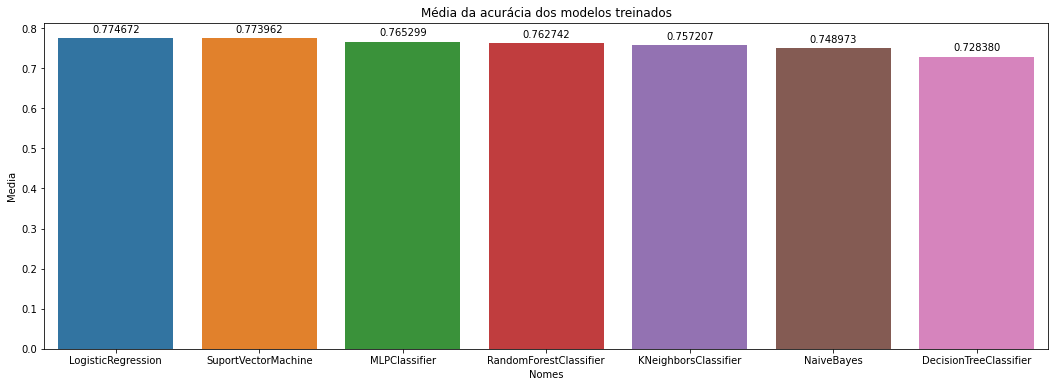

In [ ]:
fig = plt.figure(figsize = (18, 6))
splot = sns.barplot(x="Nomes", y="Media", data=nome_resultado.sort_values(by="Media", ascending=False))
# percorrendo cada barra e calculando sua altura para imprimir no gráfico
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Média da acurácia dos modelos treinados")